# COGS 109: Clustering of Wholesale Customers

## Source and Brief Description

Source: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers#

Each row in the dataset refers to a business that is the client of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories. The Channel column has 2 unique values for the type of businesses: horeca (Hotel/Restaurant/Cafa) and retailers. 


## Importing Important Modules:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import plotly.express as explot
import itertools
import warnings

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn import metrics
from sklearn.metrics import silhouette_score
from scipy.stats import boxcox, probplot, norm, shapiro

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings("ignore")

## Importing the CSV Data and Gathering Information:


In [3]:
# comment out for mounting google drive

# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COGS109/Wholesale_customers_data.csv')
data = pd.read_csv('Wholesale_customers_data.csv')

In [4]:
data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [5]:
# store Channel column. Could be used as labels for the dataset?
Channel = data['Channel']
Region = data['Region']

# Change this if planning to use these 2 columns
data.drop(['Region', 'Channel'], axis = 1, inplace = True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [7]:
data.describe().T

count          mean           std   min      25%     50%  \
Fresh             440.0  12000.297727  12647.328865   3.0  3127.75  8504.0   
Milk              440.0   5796.265909   7380.377175  55.0  1533.00  3627.0   
Grocery           440.0   7951.277273   9503.162829   3.0  2153.00  4755.5   
Frozen            440.0   3071.931818   4854.673333  25.0   742.25  1526.0   
Detergents_Paper  440.0   2881.493182   4767.854448   3.0   256.75   816.5   
Delicassen        440.0   1524.870455   2820.105937   3.0   408.25   965.5   

                       75%       max  
Fresh             16933.75  112151.0  
Milk               7190.25   73498.0  
Grocery           10655.75   92780.0  
Frozen             3554.25   60869.0  
Detergents_Paper   3922.00   40827.0  
Delicassen         1820.25   47943.0

## Visualization and Analyses:

### Utilizing seaborn.barplot as visualizatoin package

Show point estimates and confidence intervals as rectangular bars.

A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.

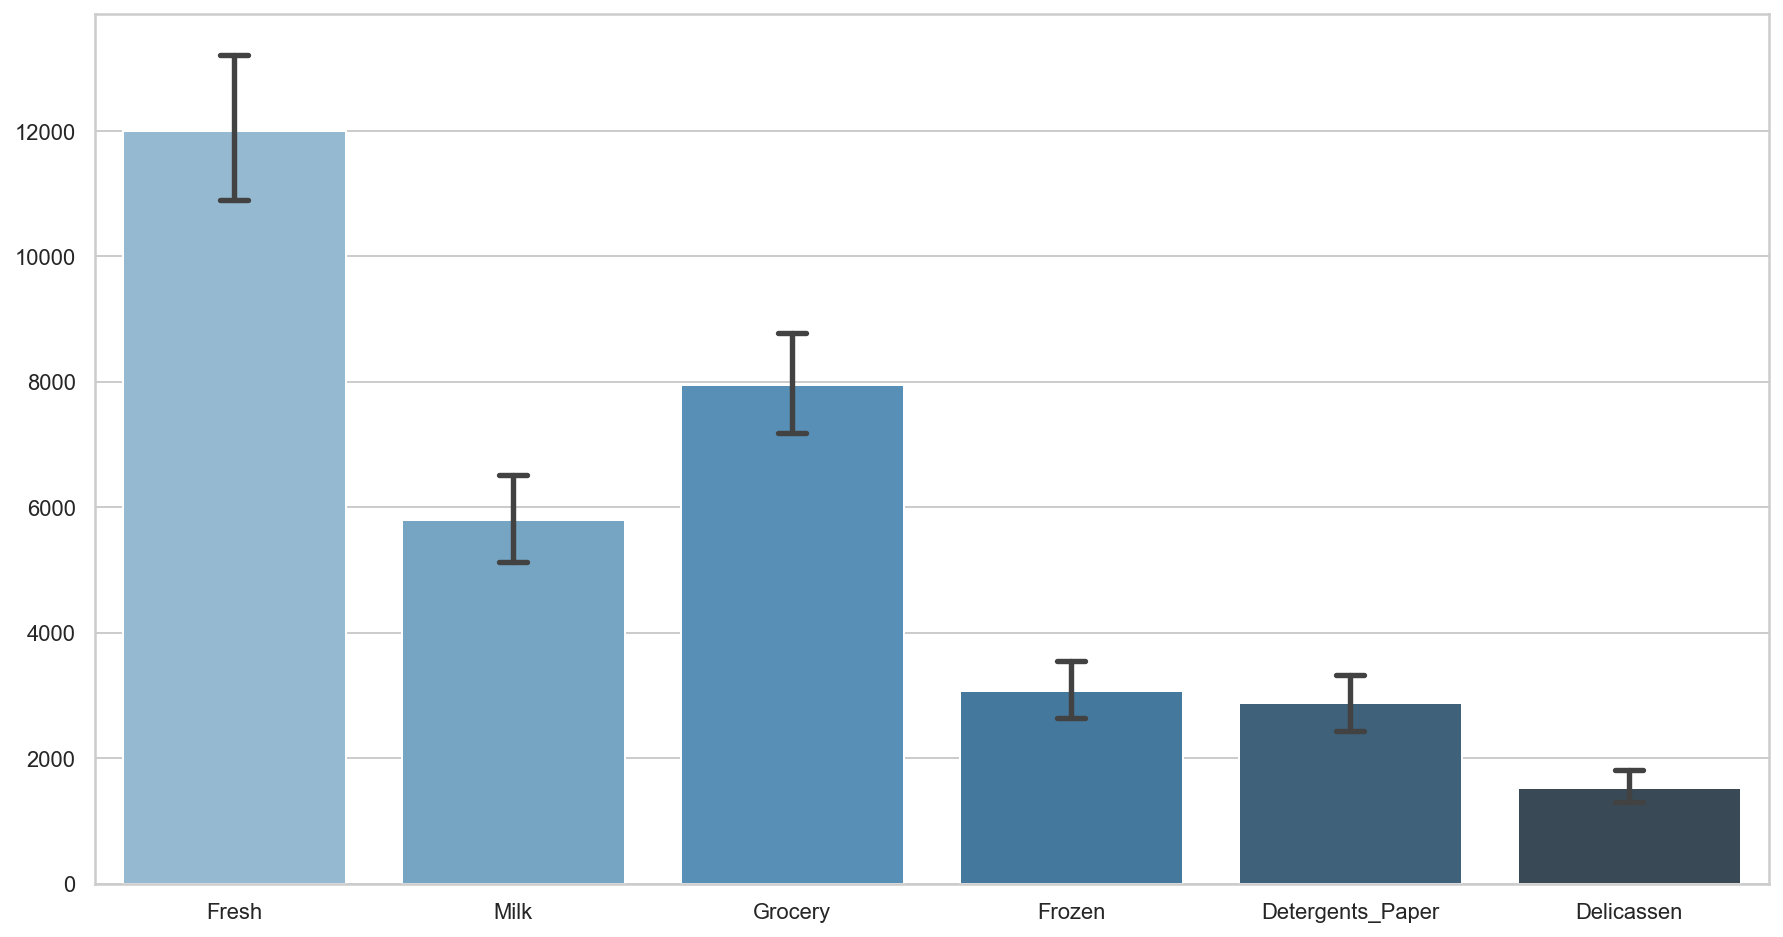

In [8]:
plt.figure(figsize = (15,8))
sns.set_theme(style="whitegrid")
sns.barplot(data=data, capsize=.1, palette="Blues_d")
plt.show()

## Analyzation:

As percieved through the Seaborn Barplot, the first nominal category of Fresh has an approximate value of 12000, which exceeds the next highest category of Grocery by a staggering 4000. The confidence interval for Fresh extends from 11000 to 13000, giving an estimate of the true value of the Fresh category. Grocery has the next preceeding value of 8000, with confidence interval of approximately 7000 to 9000. This cateogry is the next popular nominal category in the business. Next, the milk category has a confidence interval of around 7000 to 5000, with an estimate count of 5900, which corresponds to a gross business client. Both Frozen and Detergents_Paper have the same count of around 3000, with the interval ranging from higher 3000s, approximately 3700, to lower quartile 3000s, around 3200. Lastly, the least popular business model is the Delicassen nominal group. This categorical group has less that 2000 in count, around 1750 with a confidence interval of around 1600 to 1900.

In [ ]:
# un-comment to plot pairs

# _ = sns.pairplot(data, diag_kind = 'kde', height=2, aspect=0.9)

Data is not normall distributed. We can try different transformations to find one that suits this dataset.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html#scipy.stats.probplot

https://stackoverflow.com/questions/48108582/how-to-interpret-scipy-stats-probplot-results

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html


## Data Transformation for Data Normalization

Since the data spans a space that is not normalized, we attempt to draw out a noramalized space. This preprocessing of the data allows for unskewed data that has a reduced span. 

## Visualization of the Regular Data

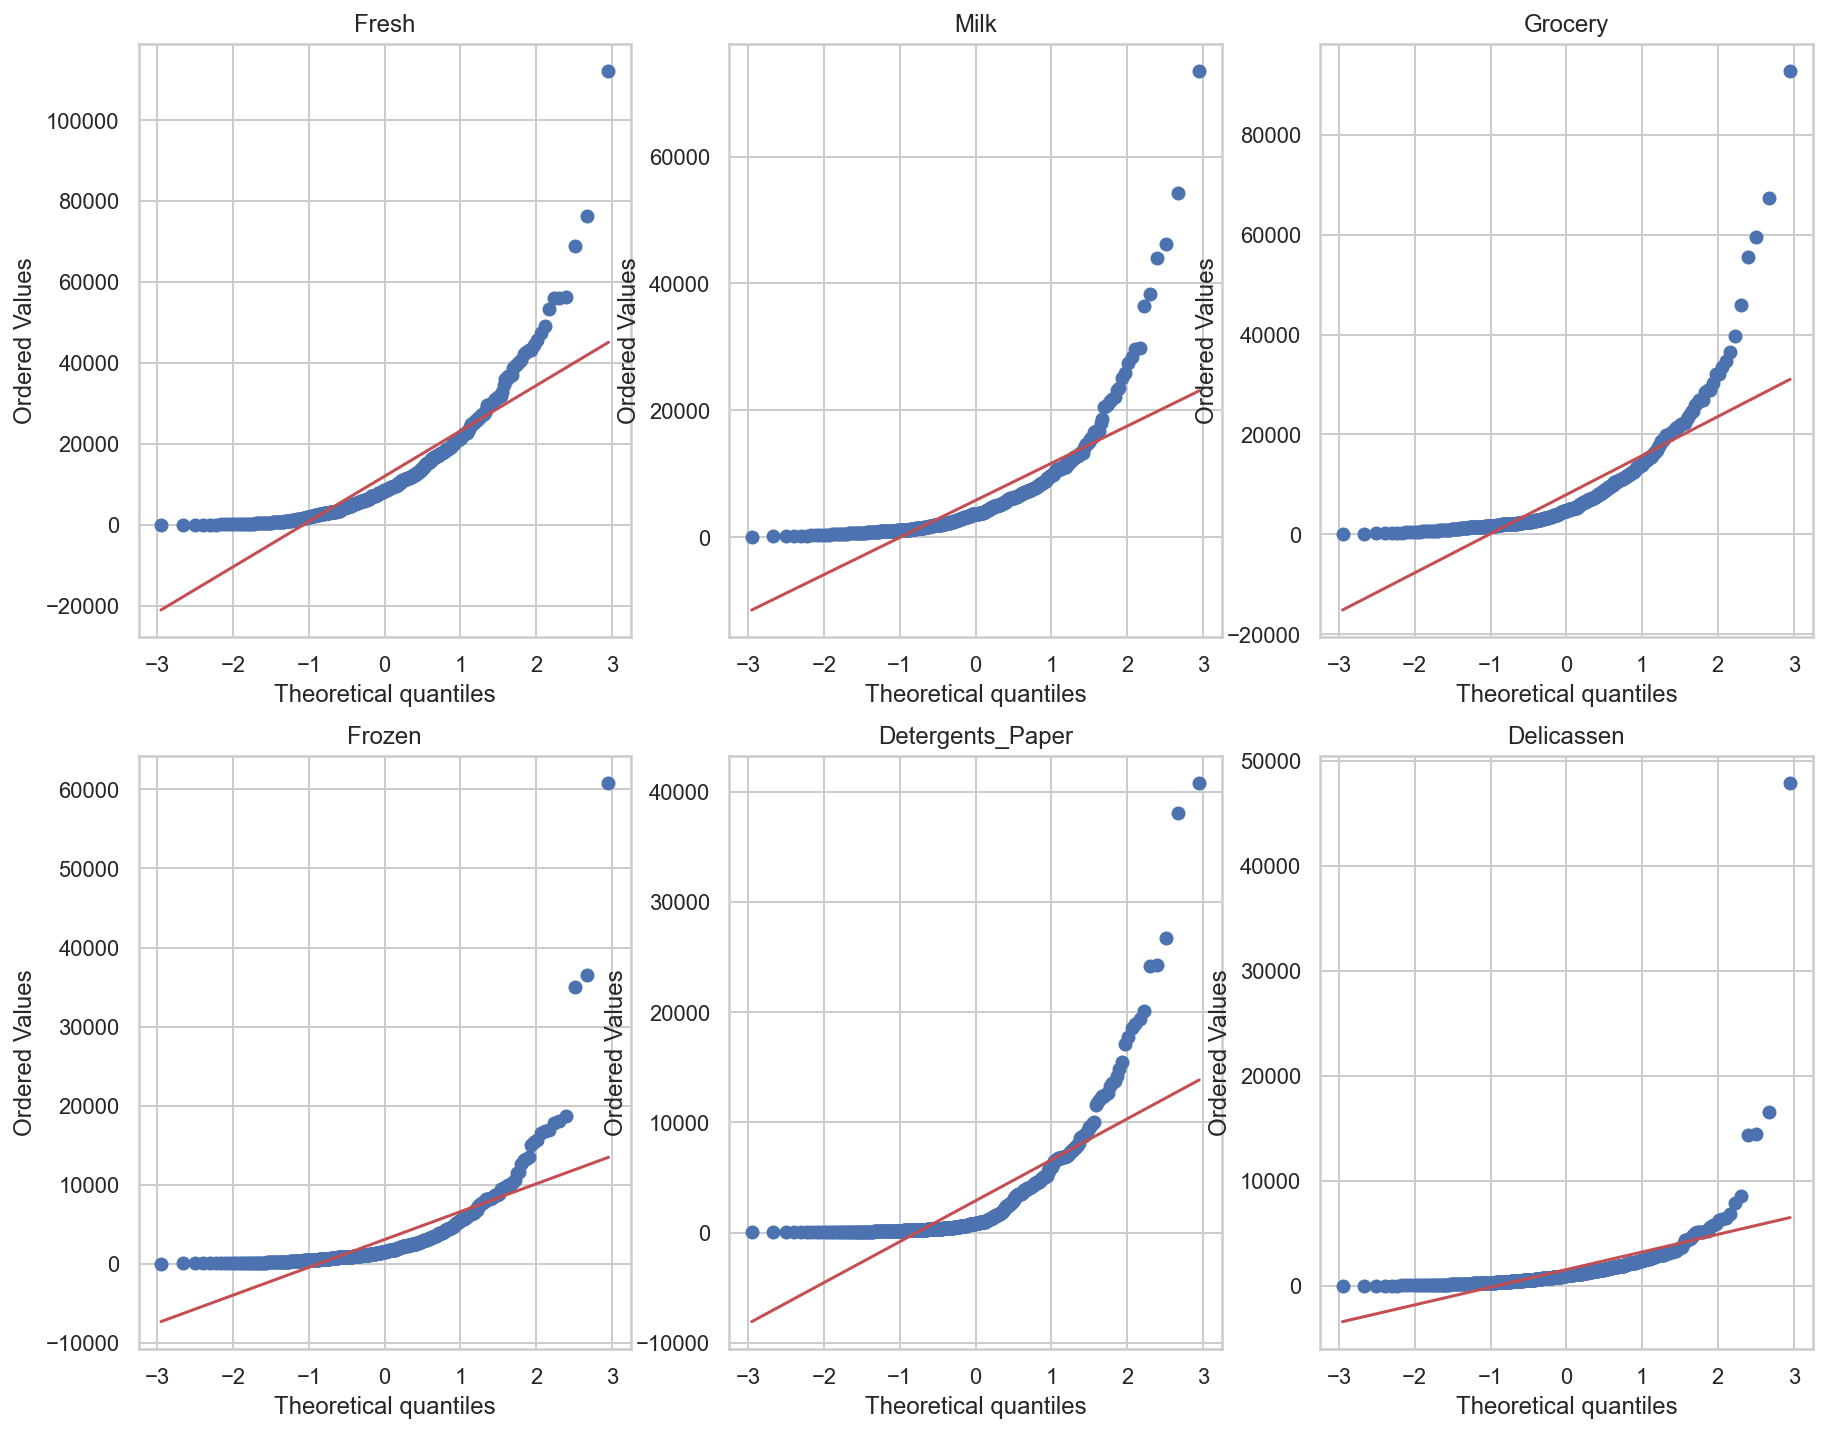

Tests       p-value
Fresh             0.781436  7.918286e-24
Milk              0.628334  9.762062e-30
Grocery           0.676231  3.906209e-28
Frozen            0.528297  1.291332e-32
Detergents_Paper  0.605482  1.914593e-30
Delicassen        0.361068  1.753408e-36

In [9]:
# testing on regular data

test = {}
plt.figure(figsize=(15, 12))

for i in range(0,6):
    ax = plt.subplot(2, 3, i+1)
    probplot(x=data[data.columns[i]], dist=norm, plot=ax)
    plt.title(data.columns[i])
    test[data.columns[i]] = shapiro(data[data.columns[i]])
    
plt.show()

pd.DataFrame(test, index=['Tests', 'p-value']).T

The graphs above visualize the regular data, which helps us witness the disparity the originates from the regular data.

## Visualization of the Log Transformed Data

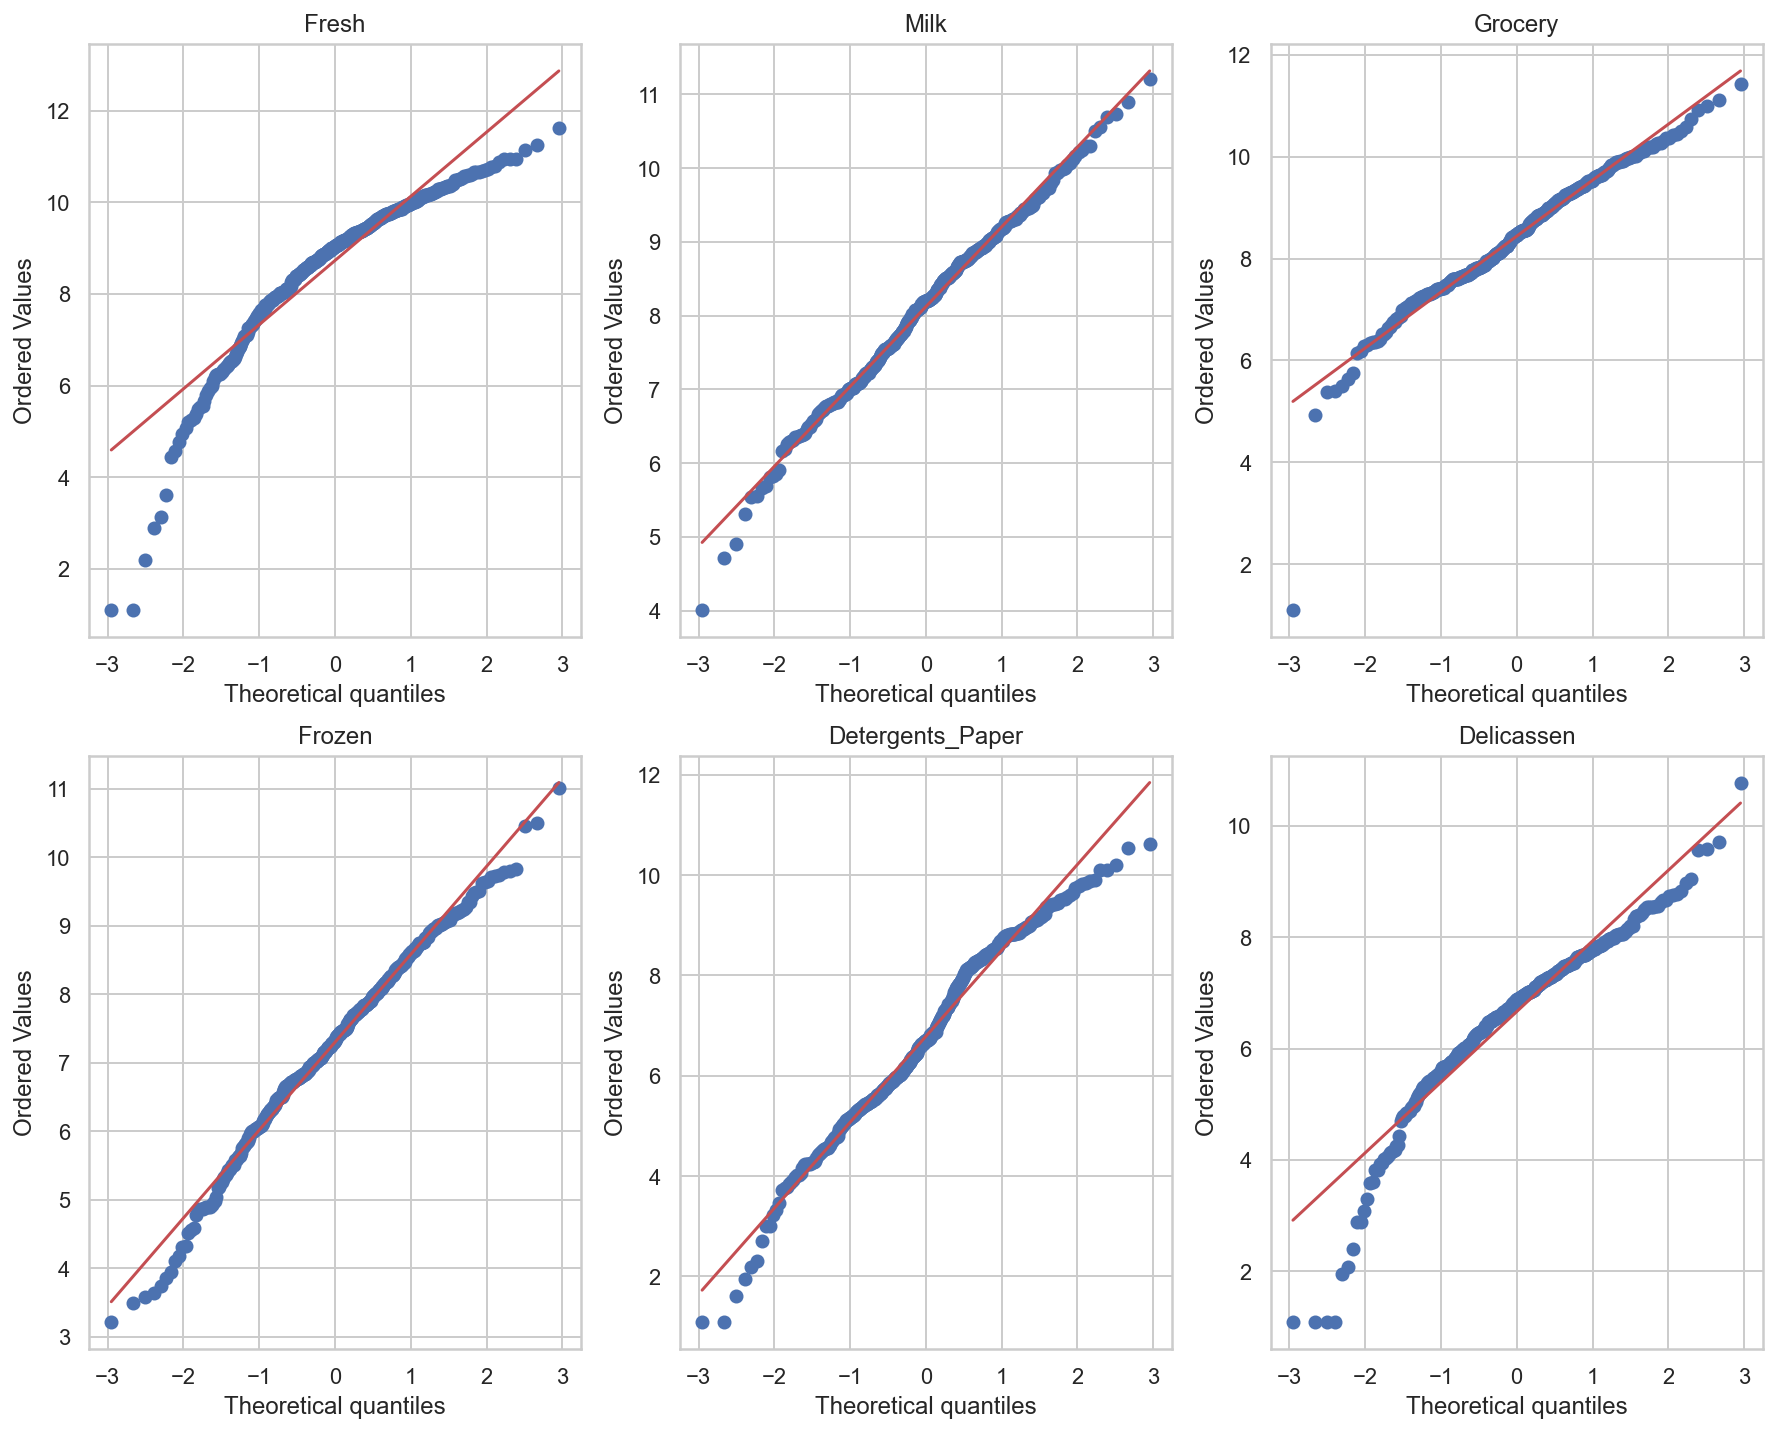

Tests       p-value
Fresh             0.890065  3.303679e-17
Milk              0.994083  8.528145e-02
Grocery           0.964565  8.116720e-09
Frozen            0.990030  4.431482e-03
Detergents_Paper  0.981625  2.265693e-05
Delicassen        0.929627  1.575756e-13

In [10]:
# testing on log transformed data
log_data = np.log(data)

test = {}
plt.figure(figsize=(15, 12))

for i in range(0,6):
    ax = plt.subplot(2, 3, i+1)
    probplot(x=log_data[log_data.columns[i]], dist=norm, plot=ax)
    plt.title(log_data.columns[i])
    test[log_data.columns[i]] = shapiro(log_data[log_data.columns[i]])
    
plt.show()

pd.DataFrame(test, index=['Tests', 'p-value']).T

The graphs above visualize the log-transformed data, which helps us perceive the new trend of the data and if it fits a normal distribution.

## BoxCox Transformation on Regular Data

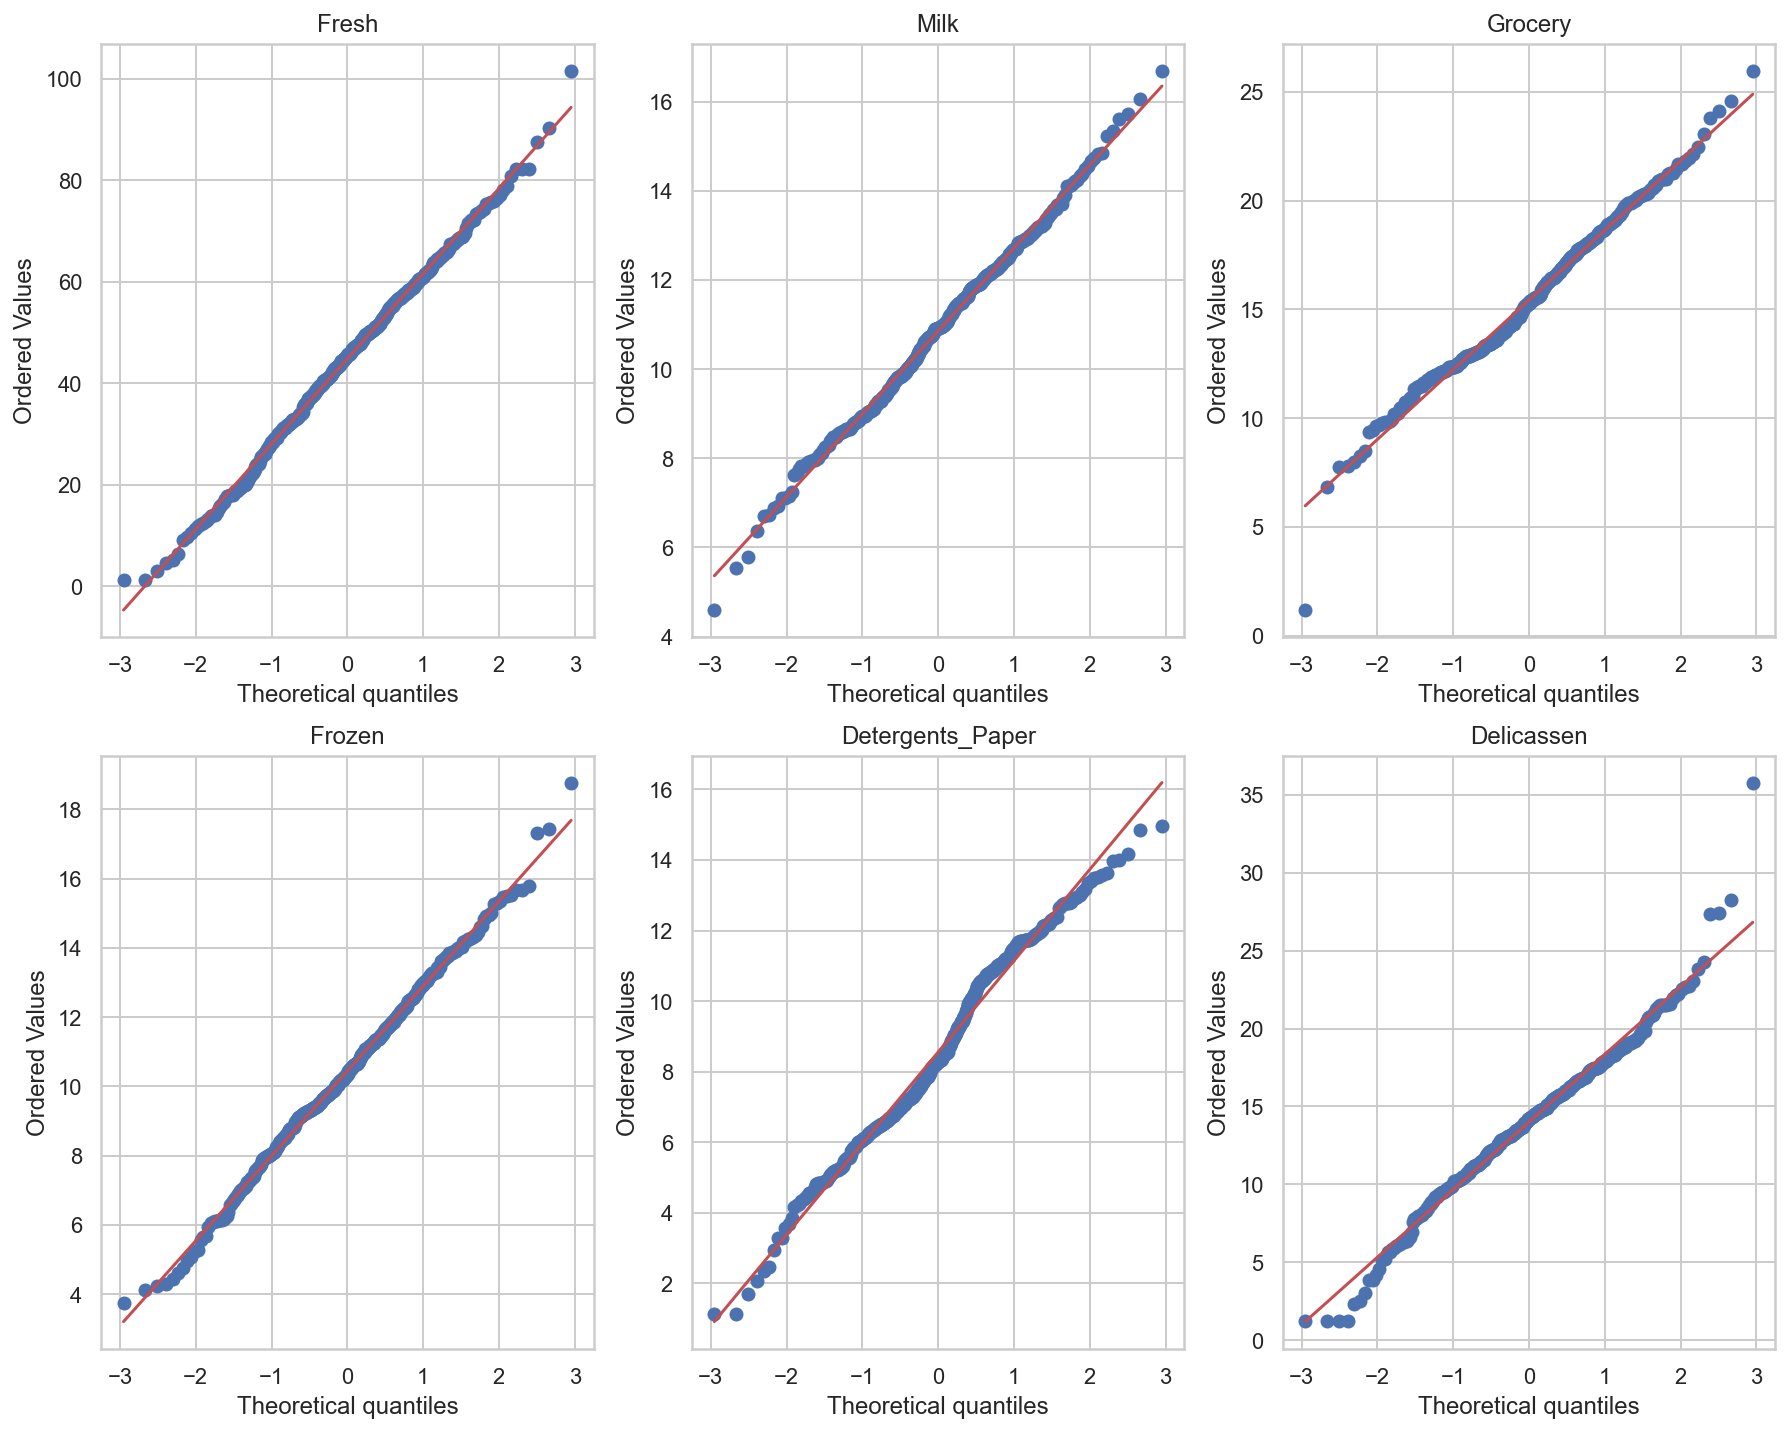

Test   p-value
Fresh             0.997445  0.737682
Milk              0.996949  0.584299
Grocery           0.989161  0.002424
Frozen            0.997237  0.673424
Detergents_Paper  0.985208  0.000185
Delicassen        0.981869  0.000026

In [11]:
test = dict()

plt.figure(figsize=(15, 12))
plt.title('BoxCox Transformation')

for i in range(6):
    ax = plt.subplot(2, 3, i+1)
    
    # testing with boxcox transformations
    x, _ = boxcox(data[data.columns[i]])
    probplot(x = x, dist=norm, plot=ax)
    plt.title(data.columns[i])
    test[data.columns[i]] = shapiro(x)
    
plt.show()

pd.DataFrame(test, index=['Test', 'p-value']).T

The graphs above visualize the BoxCox-transformed data. In these graphs, we see a better trend towards normalization than the last methods.

## StandardizeScaler implementation on Regular Data

Standardize features by removing the mean and scaling to unit variance:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [19]:
# use box-cox as the transformation of choice and apply StandardScaler

# box = PowerTransformer(method='box-cox')
# box_data = box.fit_transform(data)
stnrd_data = StandardScaler().fit_transform(data)

data_normal = pd.DataFrame(stnrd_data, columns=data.columns)
print("Standard Scaled Data:")
data_normal.head()


Standard Scaled Data:


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339
1 -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347

In [18]:
# un-comment to plot pairs

# _ = sns.pairplot(data_normal, diag_kind = 'kde', height=2, aspect=0.9)

In [20]:
corr = data_normal.corr()
corr

Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
Fresh             1.000000  0.100510 -0.011854  0.345881         -0.101953   
Milk              0.100510  1.000000  0.728335  0.123994          0.661816   
Grocery          -0.011854  0.728335  1.000000 -0.040193          0.924641   
Frozen            0.345881  0.123994 -0.040193  1.000000         -0.131525   
Detergents_Paper -0.101953  0.661816  0.924641 -0.131525          1.000000   
Delicassen        0.244690  0.406368  0.205497  0.390947          0.069291   

                  Delicassen  
Fresh               0.244690  
Milk                0.406368  
Grocery             0.205497  
Frozen              0.390947  
Detergents_Paper    0.069291  
Delicassen          1.000000

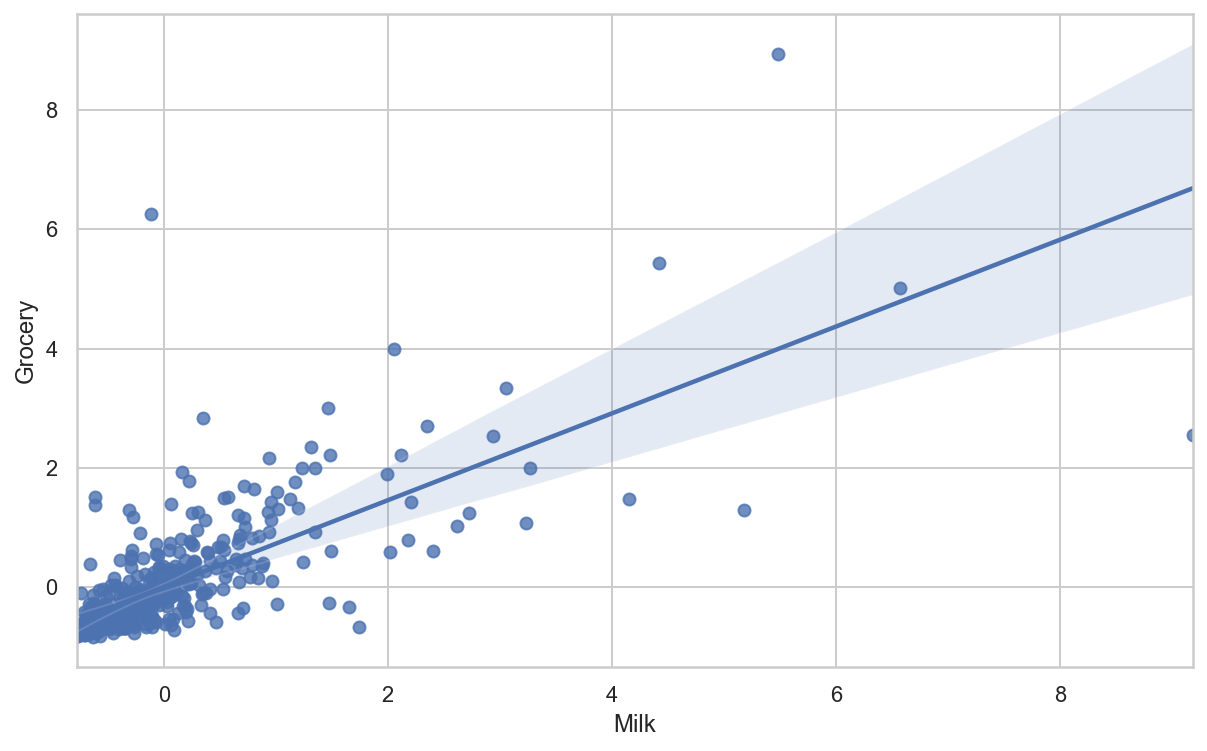

In [21]:
plt.figure(figsize=(10,6))
sns.regplot(data=data_normal, x="Milk",y="Grocery")
plt.show()

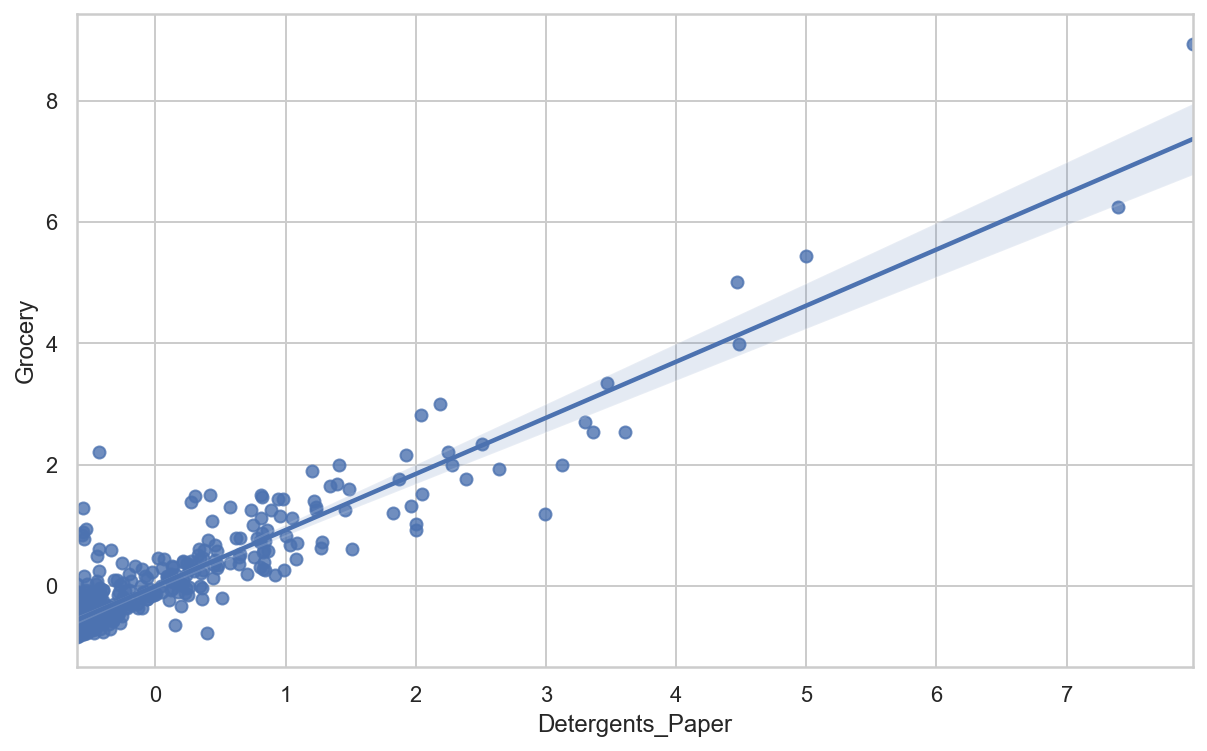

In [22]:
plt.figure(figsize=(10,6))
sns.regplot(data=data_normal, x="Detergents_Paper",y="Grocery")
plt.show()

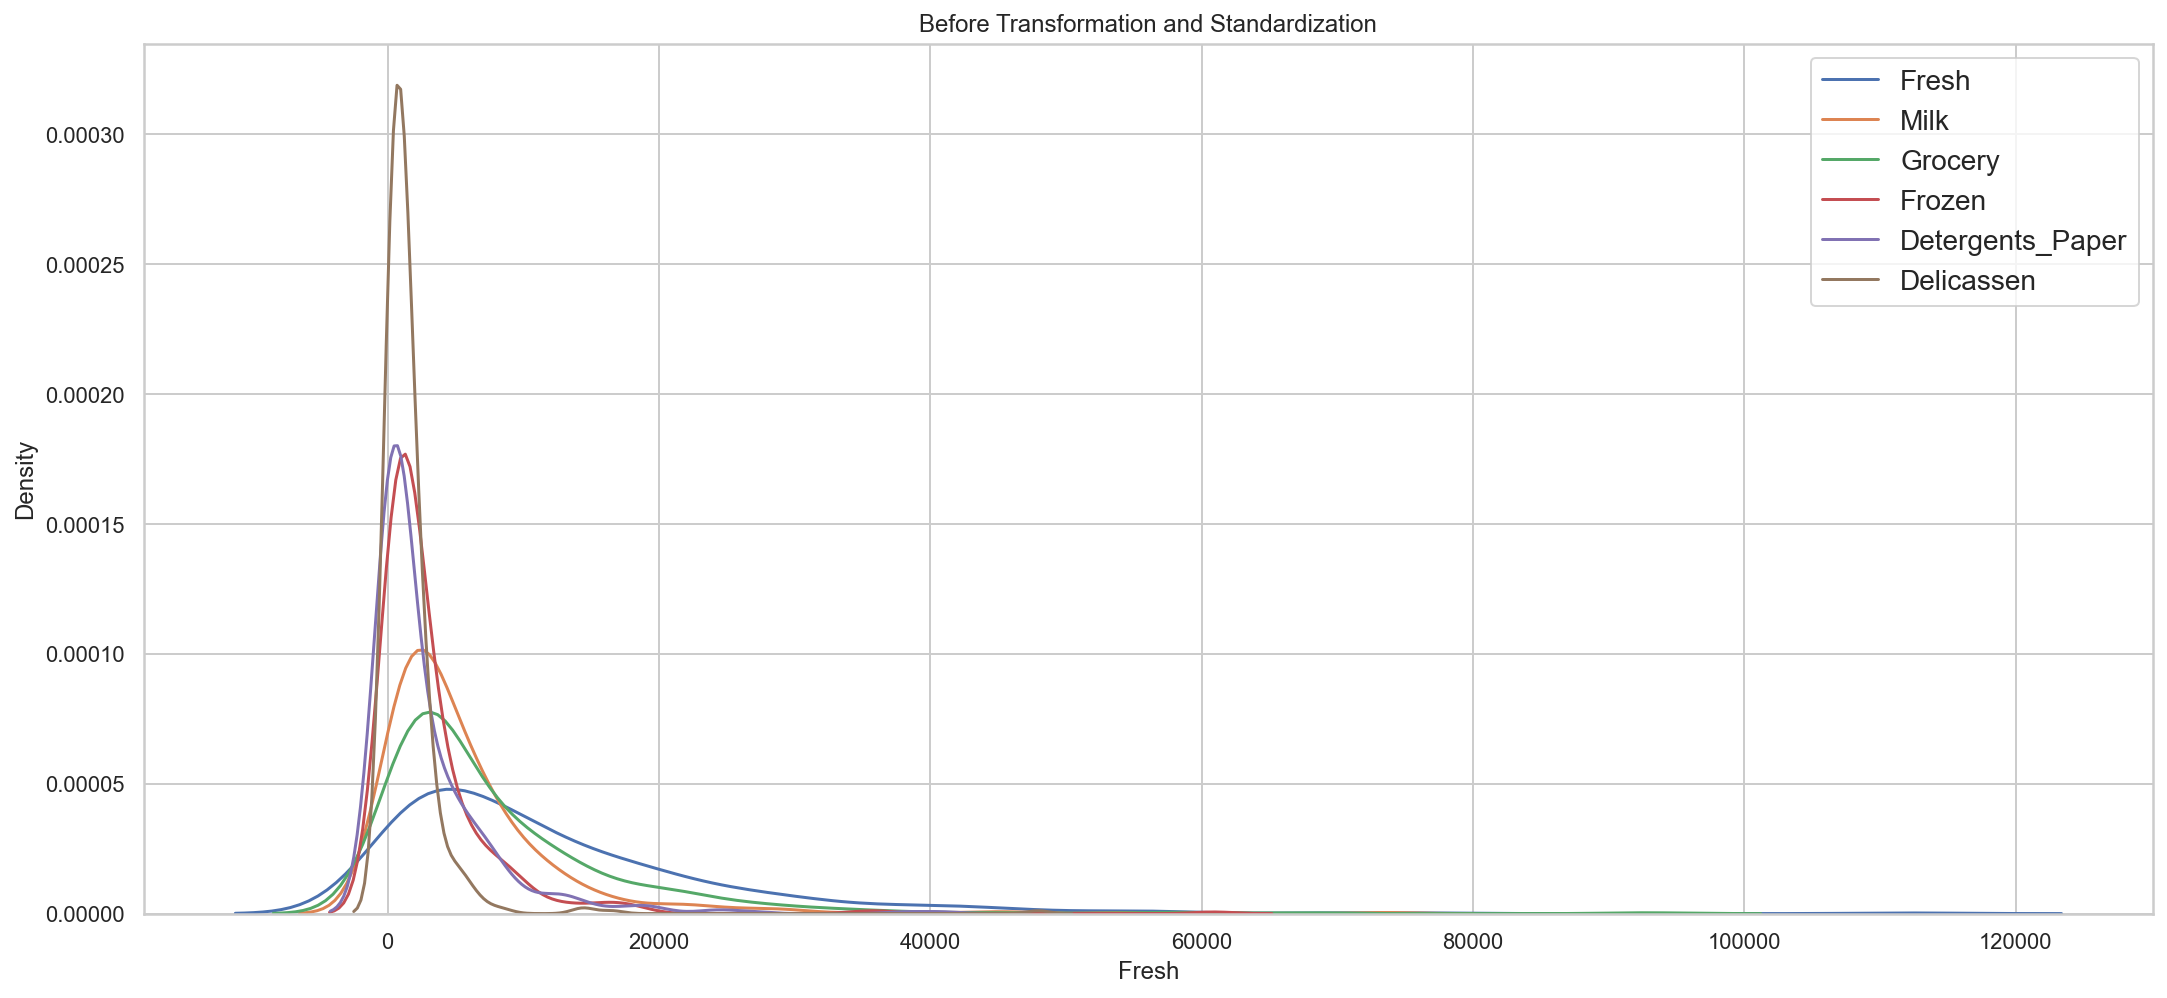

In [23]:
plt.figure(figsize = (18,8))
plt.title('Before Transformation and Standardization')

for cols in data.columns.values:
    ax = sns.kdeplot(data[cols], Label=cols)
    ax.legend(loc=0, prop={'size': 14})

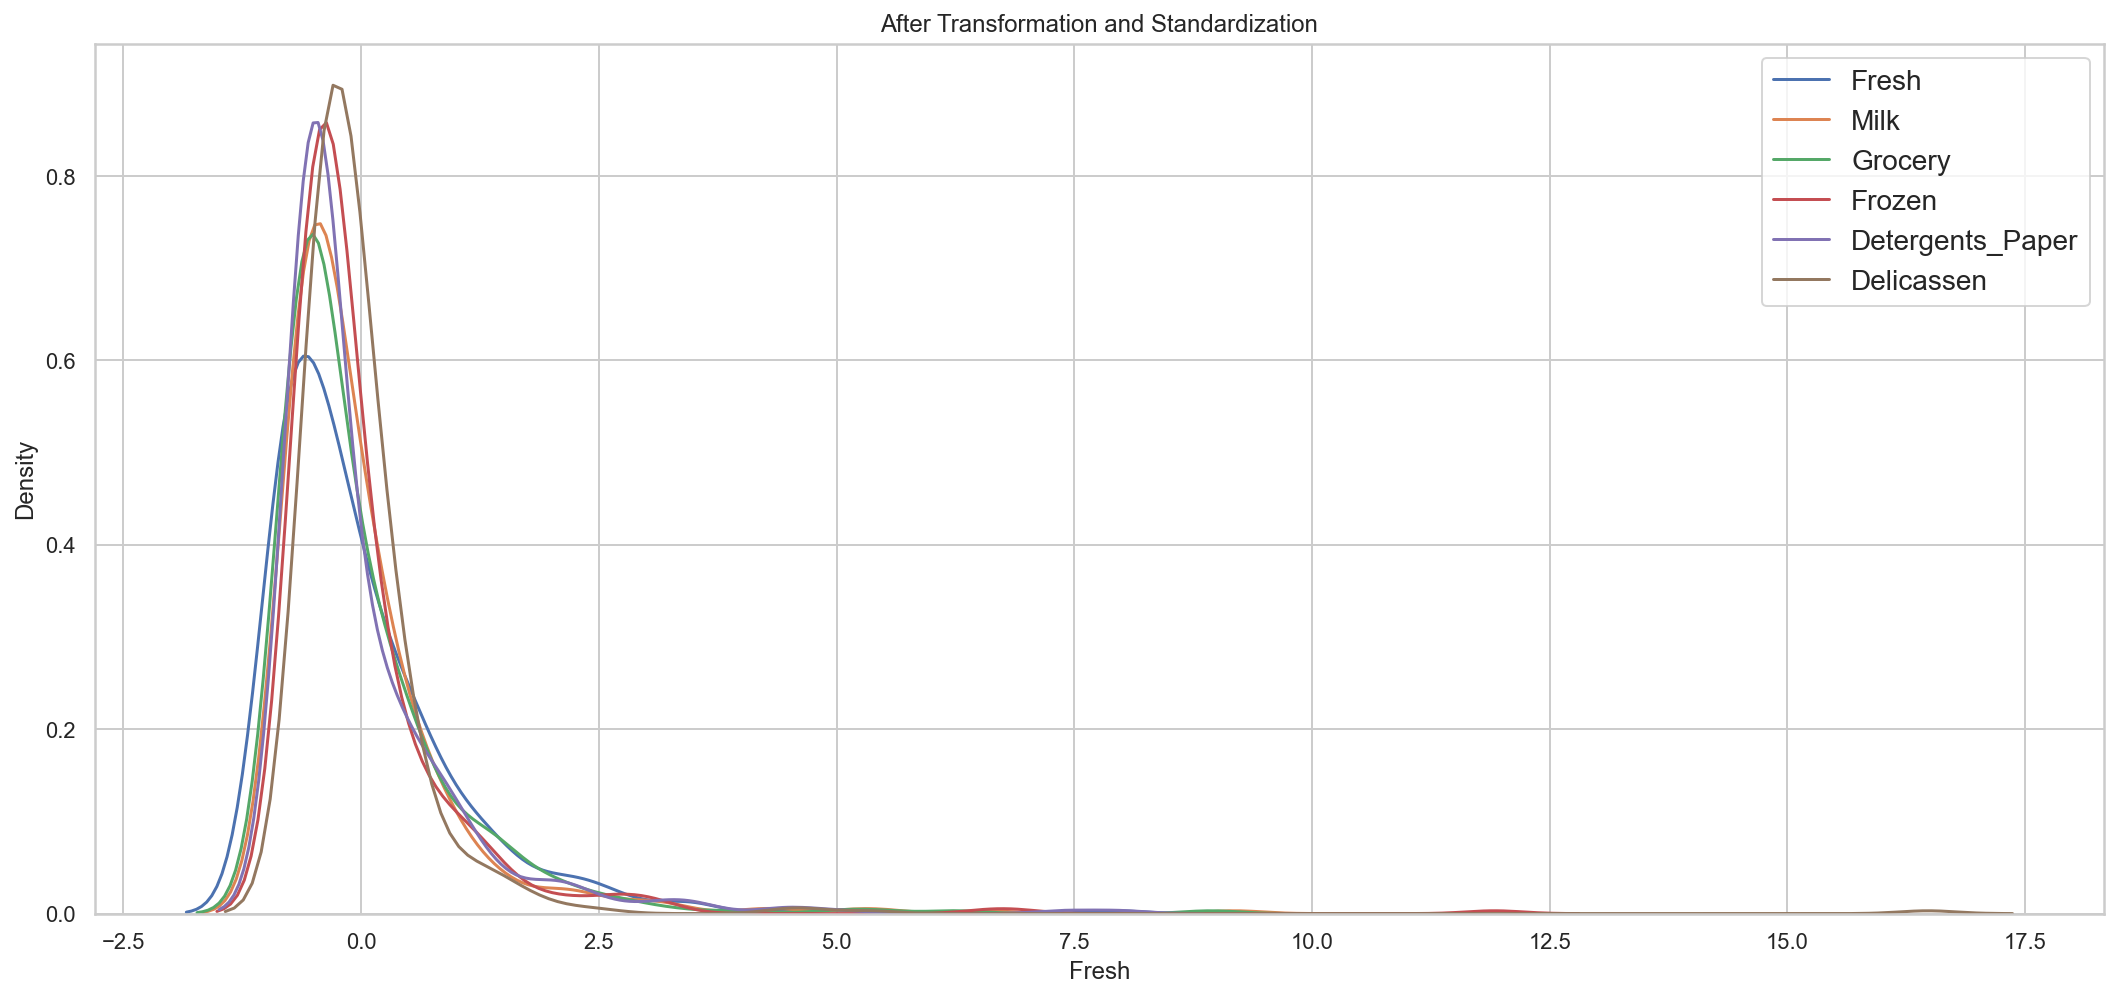

In [24]:
plt.figure(figsize = (18,8))
plt.title('After Transformation and Standardization')

for cols in data_normal.columns.values:
    ax = sns.kdeplot(data_normal[cols], Label=cols)
    ax.legend(loc=0, prop={'size': 14})

The above graph shows the normalization of the data after transformation and standardization.

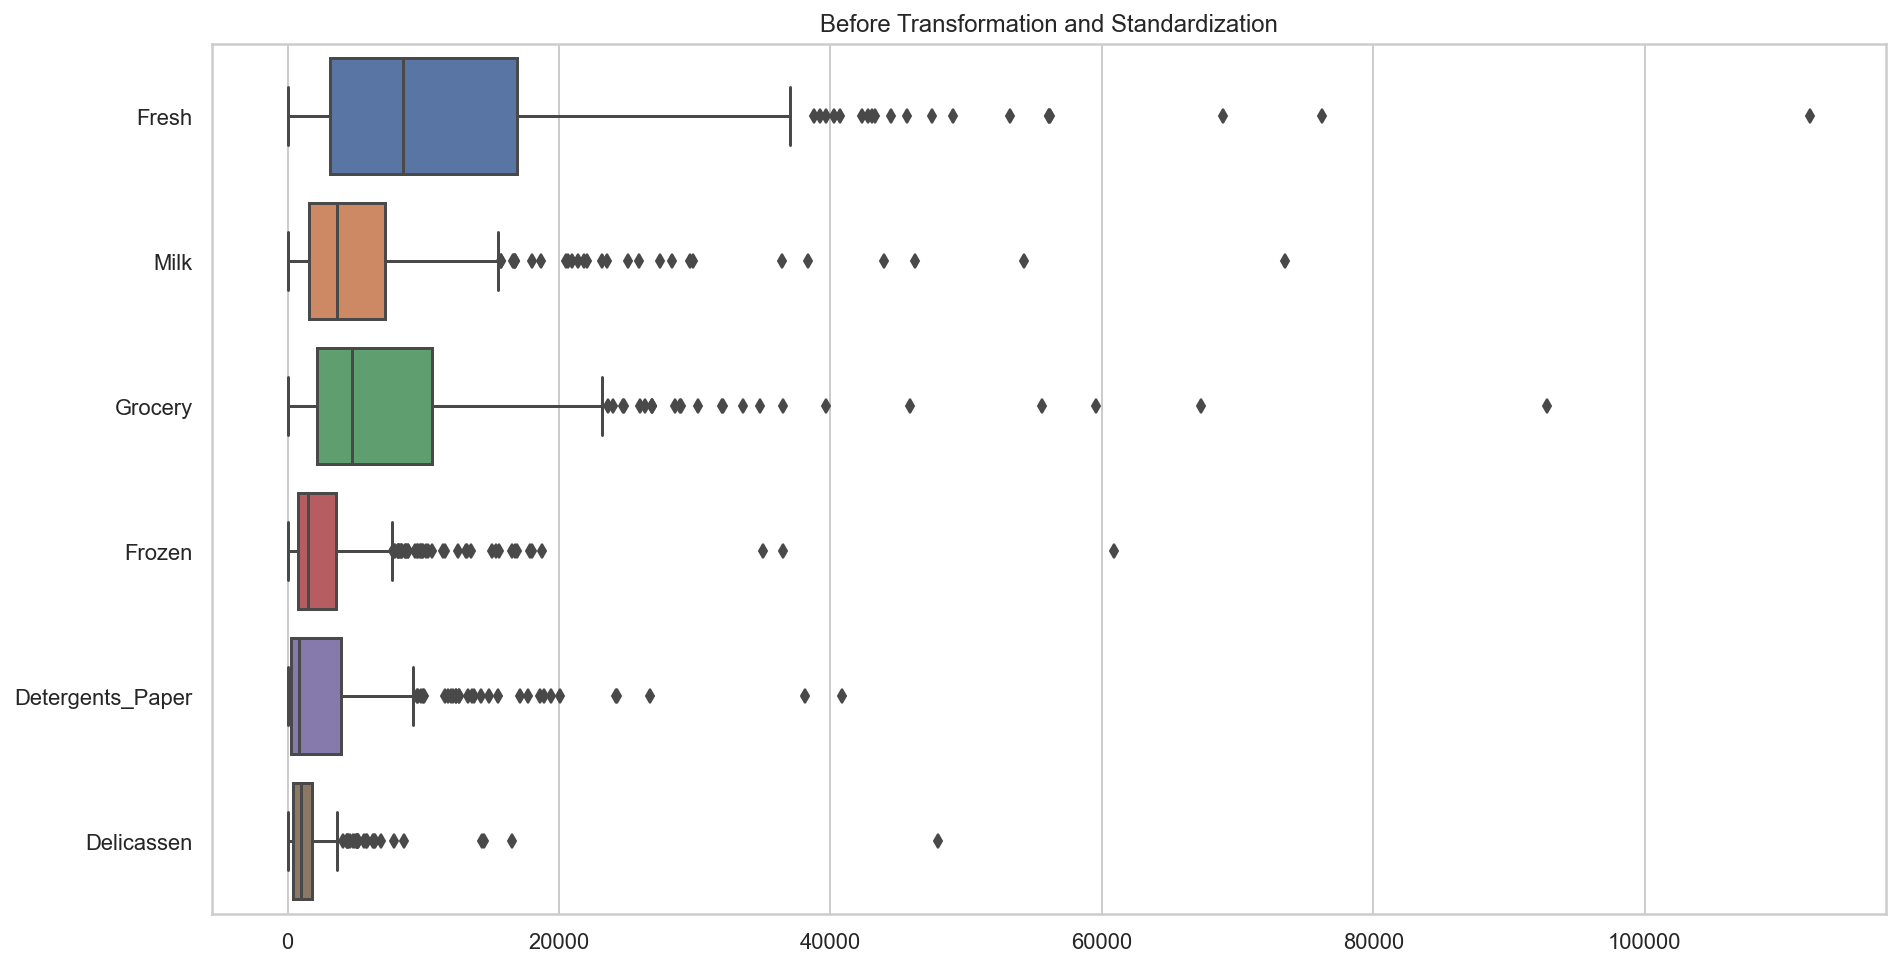

In [25]:
plt.figure(figsize = (15,8))
sns.boxplot(data=data, orient='h')
plt.title('Before Transformation and Standardization')
plt.show()

The data before the transformation and the standardization is varied with outliers and different sized ranges.

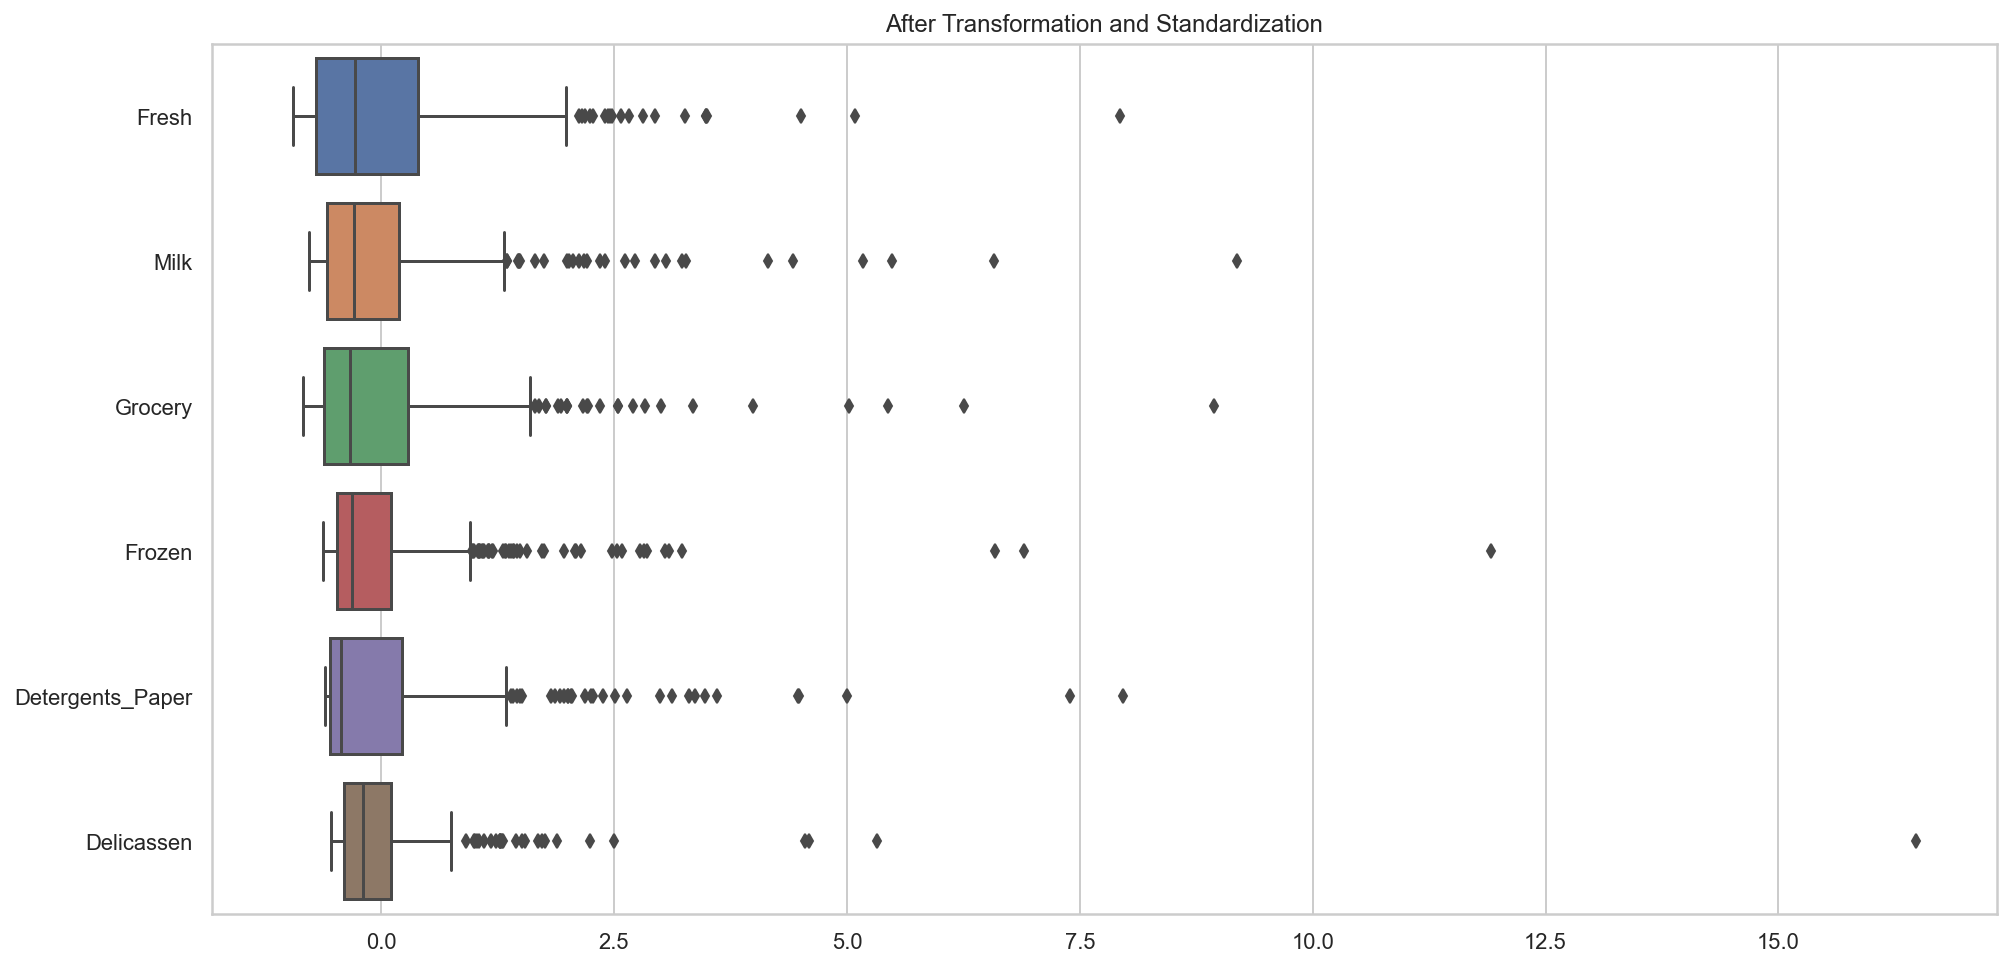

In [26]:
plt.figure(figsize = (16,8))
sns.boxplot(data=data_normal, orient='h')
plt.title('After Transformation and Standardization')
plt.show()

The data after the transformation and the standardization was repositioned around zero with less outliers and more similar ranges. The central tendencies are also more aligned among the nominal categories.

### Run kmeans with all variables:

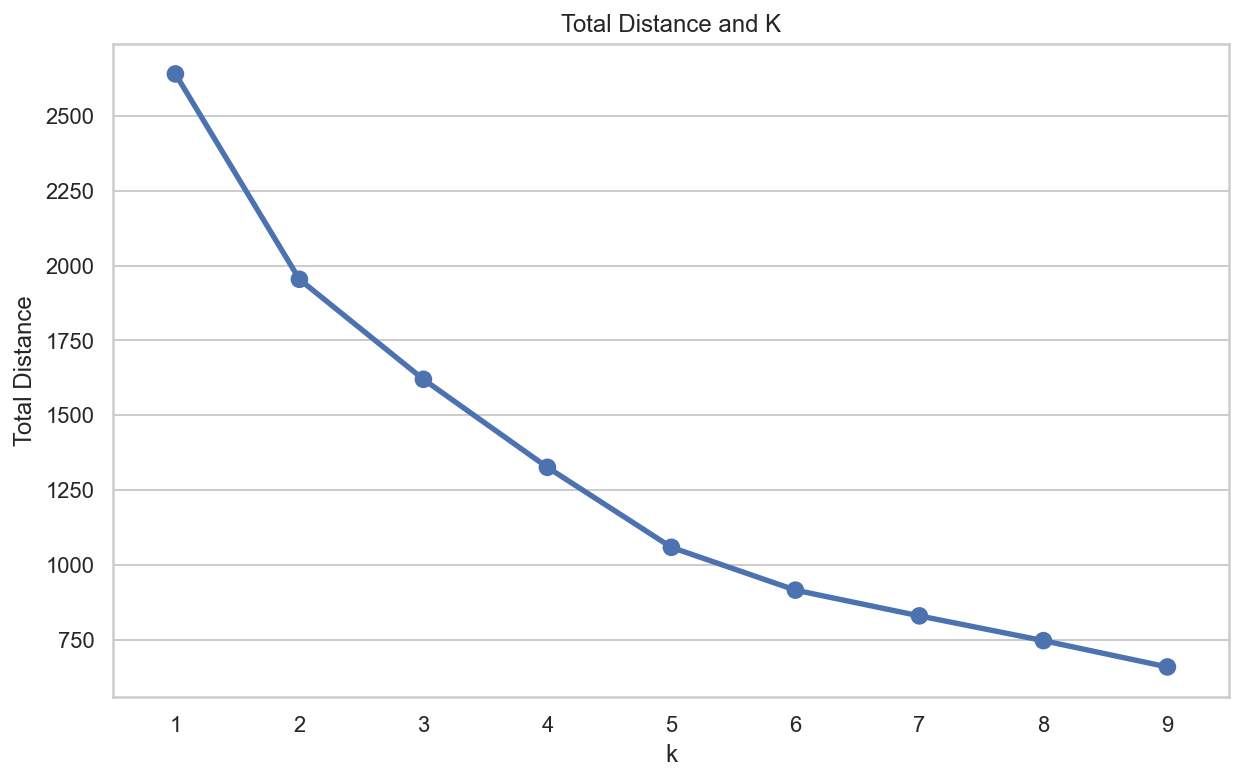

In [27]:
# try different k values to find the elbow
dist = {}

for k in range(1,10):
    kmeans = KMeans(n_clusters = k, init='k-means++', random_state=1)
    cluster_labels = kmeans.fit_predict(data_normal)
    dist[k] = kmeans.inertia_
   
plt.figure(figsize=(10,6))
plt.xlabel('k')
plt.ylabel('Total Distance')
plt.title('Total Distance and K')
sns.pointplot(x = list(dist.keys()), y = list(dist.values()))

plt.show()

It appears that k=2 or 3 is a good choice of kvalue for our kmeans algorithm as the pivot seems to commence around those values of k.

Let's see what features are most important using PCA:

## Feature Importance Extraction with PCA

In [28]:
# PCA without specifying number of components

pca = PCA()
while True: 
    try: 
        comp = pca.fit_transform(data_normal)
        break 
    except: 
        continue


print("How much of variance in data is explained by each each component:\n")
pca.explained_variance_ratio_

How much of variance in data is explained by each each component:



array([0.44082893, 0.283764  , 0.12334413, 0.09395504, 0.04761272,
       0.01049519])

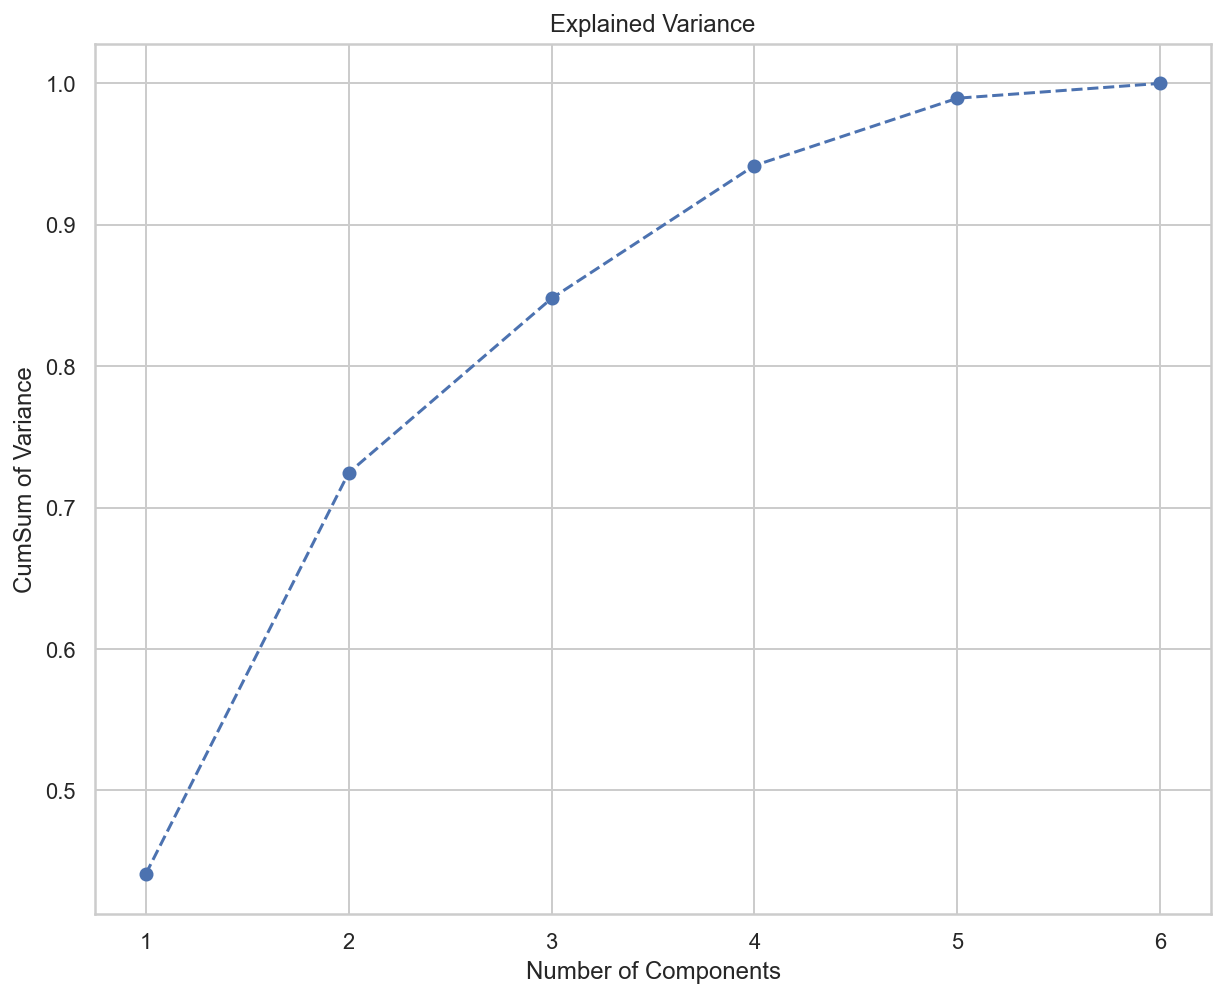

In [29]:
plt.figure(figsize=(10,8))
plt.plot(range(1,7), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('CumSum of Variance')
plt.show()

80% of data is explained by only 2 components. We will test on 2 and 3 components to transform the data and then reconstruct the data to run kmeans on the reconstructed data.

In [30]:
# run PCA to get 2 components
num_comp = 2

pca = PCA()
while True: 
    try: 
        pca = PCA()
        pca.fit(data_normal)
        
        # reconstruct data from 2 components
        data_2f = np.dot(pca.transform(data_normal)[:,:num_comp], pca.components_[:num_comp,:])
        
        # we need to add the mean that was removed during standard scaling
        mean_data = np.mean(data_normal, axis=0)
        data_2f += mean_data
        
        break 
    except: 
        continue


### Run kmeans on PCA transformed/reconstructed data (only 2 features):

In [31]:
# get 2 columns of the reconstructed data
data_2f = data_2f[:, 0:2]

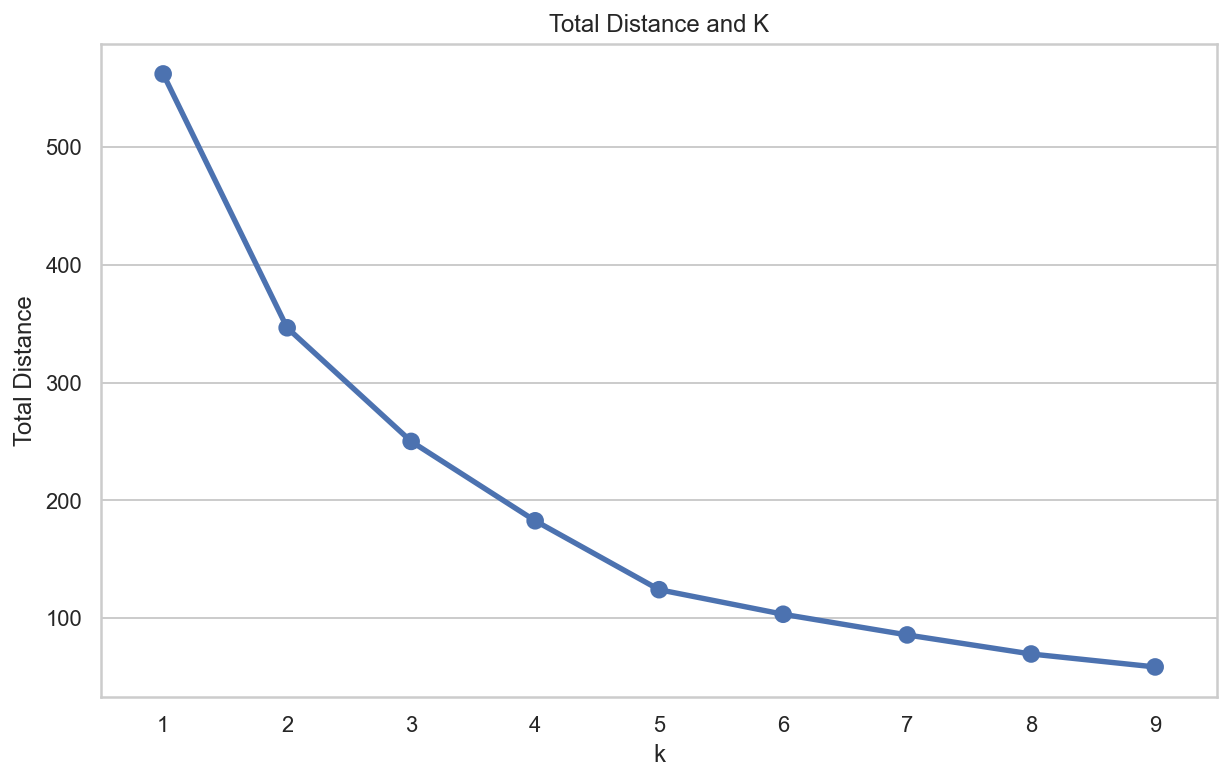

In [32]:
# try different k values to find the elbow
dist = {}

for k in range(1,10):
    kmeans = KMeans(n_clusters = k, init='k-means++', random_state=1)
    # using data_2f (reduced data)
    cluster_labels = kmeans.fit_predict(data_2f)
    dist[k] = kmeans.inertia_
   
plt.figure(figsize=(10,6))
plt.xlabel('k')
plt.ylabel('Total Distance')
plt.title('Total Distance and K')
sns.pointplot(x = list(dist.keys()), y = list(dist.values()))

plt.show()

From the plot above, we can run kmeans with 2 and 3 clusters using the reduced data.

In [33]:
# k=2 
kmeans_2f = KMeans(n_clusters = 2, init='k-means++', max_iter = 1000, random_state = 1)
kmeans_2f.fit(data_2f)
predict = kmeans_2f.predict(data_2f)
centers = kmeans_2f.cluster_centers_

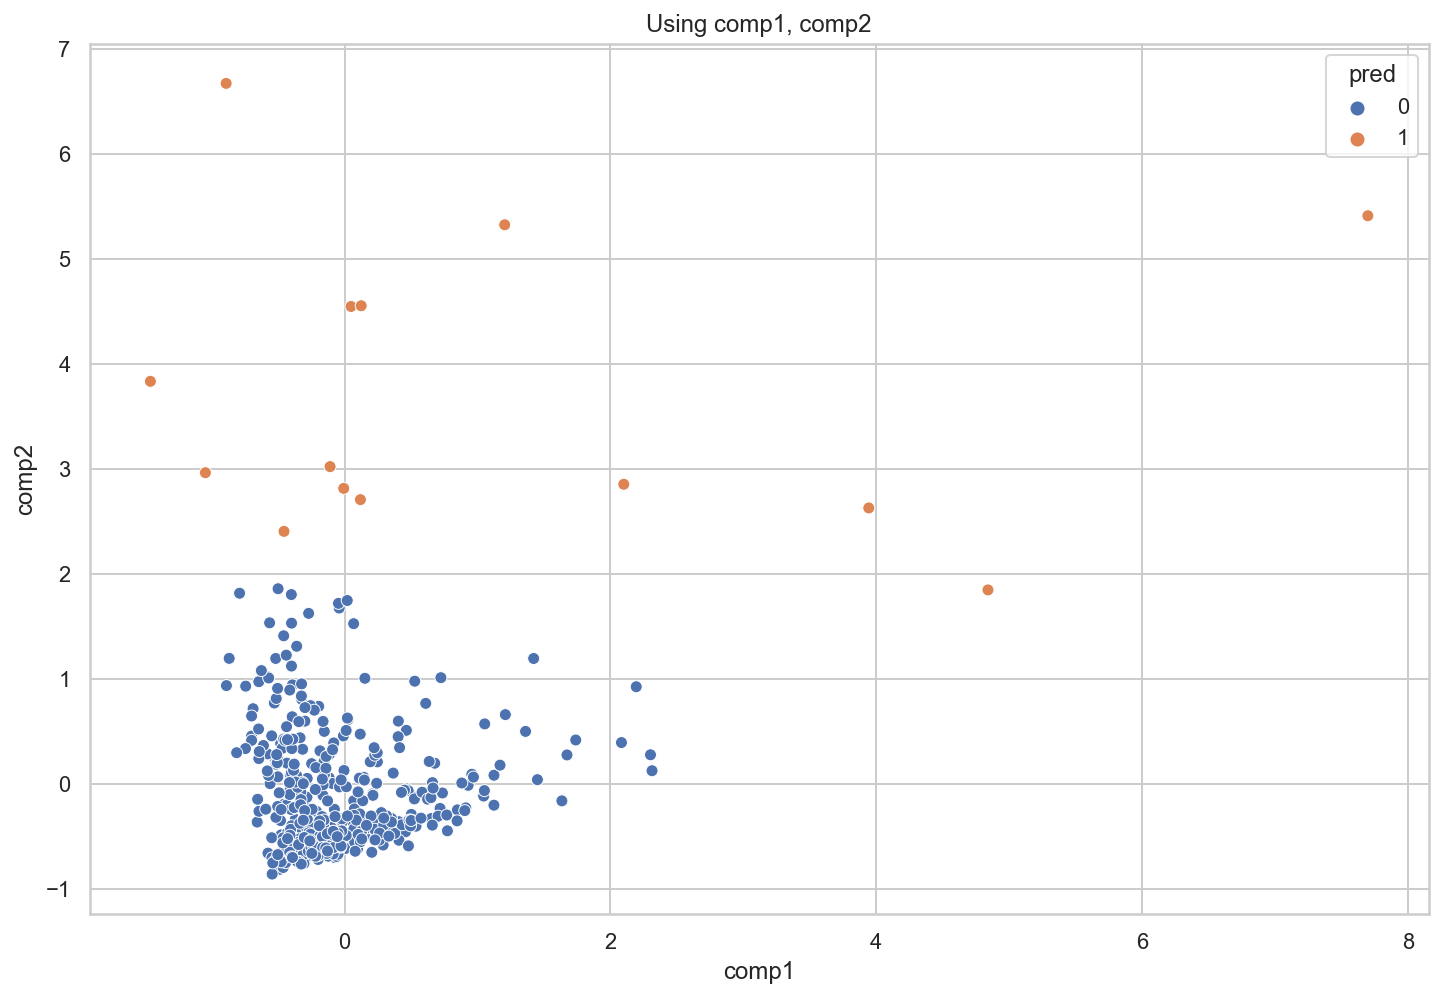

In [34]:
plt.figure(figsize = (12,8))
X = pd.DataFrame(data_2f[:, [0,1]], columns=['comp1', 'comp2'])

# we will use kmeans_2f prediction to plot the 2 clusters 
# and compare it below with "channel" label
X['pred'] = predict
sns.scatterplot('comp1', 'comp2', data=X, hue='pred', palette="deep")
plt.title('Using comp1, comp2')
plt.show()

Utilizing both component 1 and 2 for the kmeans algorithm, we get an almost medial split on the data around the 0 component 1 axis.

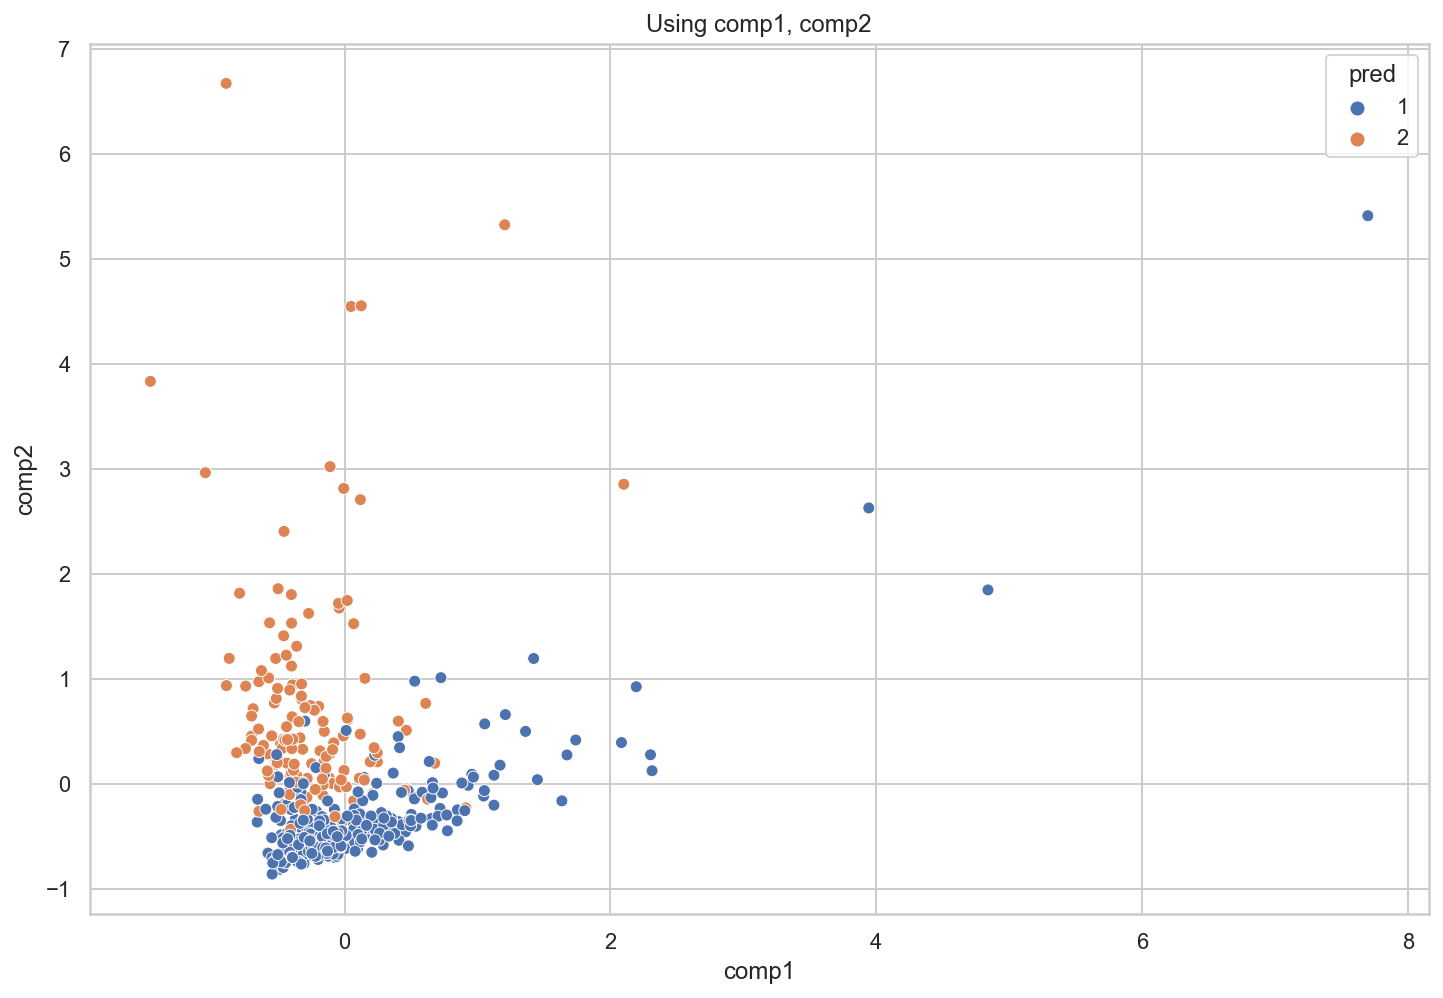

In [35]:
plt.figure(figsize = (12,8))
X = pd.DataFrame(data_2f[:, [0,1]], columns=['comp1', 'comp2'])

# using Channel column to compare plots
X['pred'] = Channel
sns.scatterplot('comp1', 'comp2', data=X, hue='pred', palette="deep")
plt.title('Using comp1, comp2')
plt.show()

Let's try 3 components to transform and reconstruct data:

In [36]:
# run PCA to get 3 components
num_comp = 3

pca = PCA()
while True: 
    try: 
        pca = PCA()
        pca.fit(data_normal)
        
        # reconstruct data from 3 components
        data_3f = np.dot(pca.transform(data_normal)[:,:num_comp], pca.components_[:num_comp,:])
        
        # we need to add the mean that was removed during standard scaling
        mean_data = np.mean(data_normal, axis=0)
        data_3f += mean_data
        
        break 
    except: 
        continue


In [37]:
data_3f.shape

(440, 6)

In [38]:
# get 3 columns of the reduced/reconstruced data
data_3f = data_3f[:, 0:3]

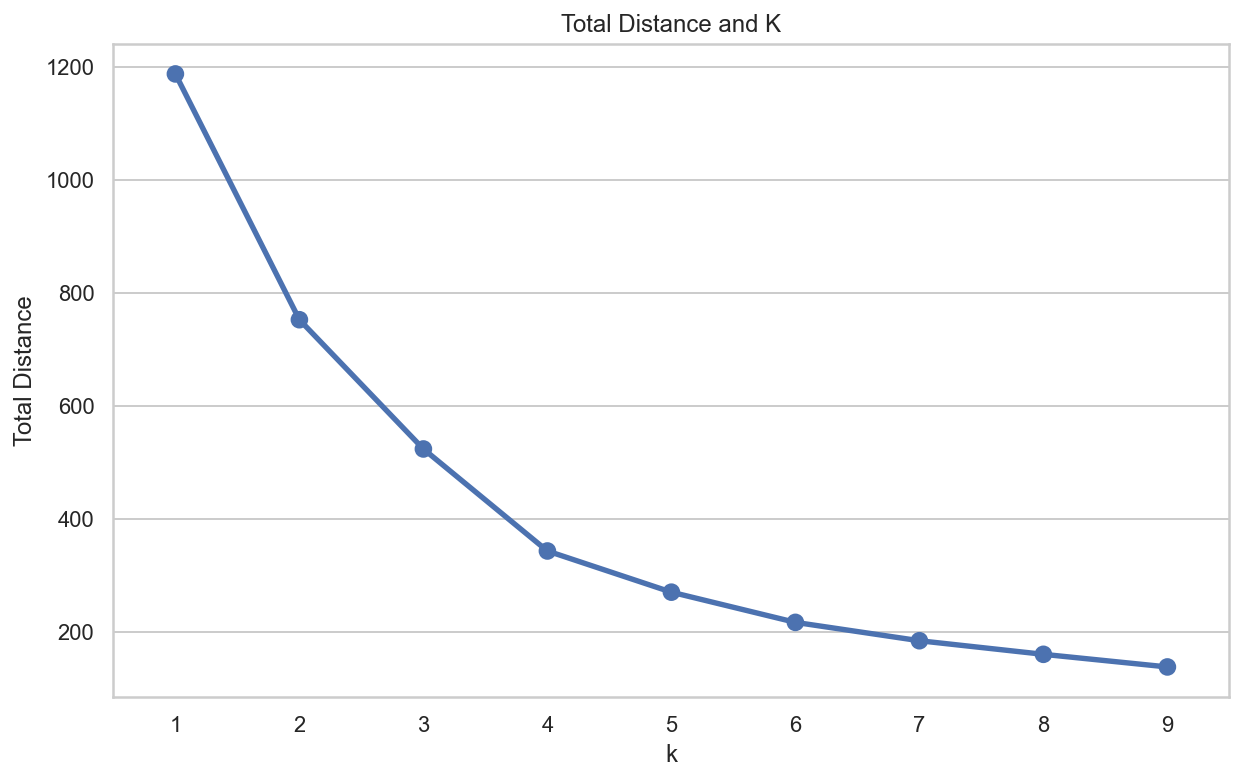

In [39]:
# try different k values to find the elbow
dist = {}

for k in range(1,10):
    kmeans = KMeans(n_clusters = k, init='k-means++', random_state=1)
    # using data_3f (reduced data)
    cluster_labels = kmeans.fit_predict(data_3f)
    dist[k] = kmeans.inertia_
   
plt.figure(figsize=(10,6))
plt.xlabel('k')
plt.ylabel('Total Distance')
plt.title('Total Distance and K')
sns.pointplot(x = list(dist.keys()), y = list(dist.values()))

plt.show()

In [40]:
# k=2 
kmeans_3f = KMeans(n_clusters = 2, init='k-means++', max_iter = 1000, random_state = 1)
kmeans_3f.fit(data_3f)
predict_3f = kmeans_3f.predict(data_3f)
centers = kmeans_3f.cluster_centers_

In [41]:
# plt.figure(figsize = (12,8))
# X = pd.DataFrame(data_3f[:, [0,1,2]], columns=['comp1', 'comp2','comp3'])

# # we will use kmeans_2f prediction to plot the 2 clusters 
# # and compare it below with "channel" label
# X['pred'] = predict
# sns.scatterplot('comp1', 'comp2', data=X, hue='pred', palette="deep")
# plt.title('Using comp1, comp2')
# plt.show()

first = data_3f[:, 0]
second = data_3f[:, 1]
third = data_3f[:, 2]
fig = explot.scatter_3d(x=first, y = second, z = third, color = predict_3f, width=900, height=600)
fig.show()

In [42]:
# using Channel column to compare plots

first = data_3f[:, 0]
second = data_3f[:, 1]
third = data_3f[:, 2]
fig = explot.scatter_3d(x=first, y = second, z = third, color = Channel, width=900, height=600)
fig.show()

The two graphs above have some similarity in how they show the 2 clusters. The second graph contains the labels grpah of the data and as we can observe, the split is not exactly on the zero value of the comp1 axis and overlapps with the 2 labels. 

Now let's try using 3 clusters on the reduced data:

In [43]:
# k=3
kmeans_2f_3c = KMeans(n_clusters = 3, init='k-means++', max_iter = 1000, random_state = 1)
kmeans_2f_3c.fit(data_2f)
predict_3c = kmeans_2f_3c.predict(data_2f)
centers_3c = kmeans_2f_3c.cluster_centers_

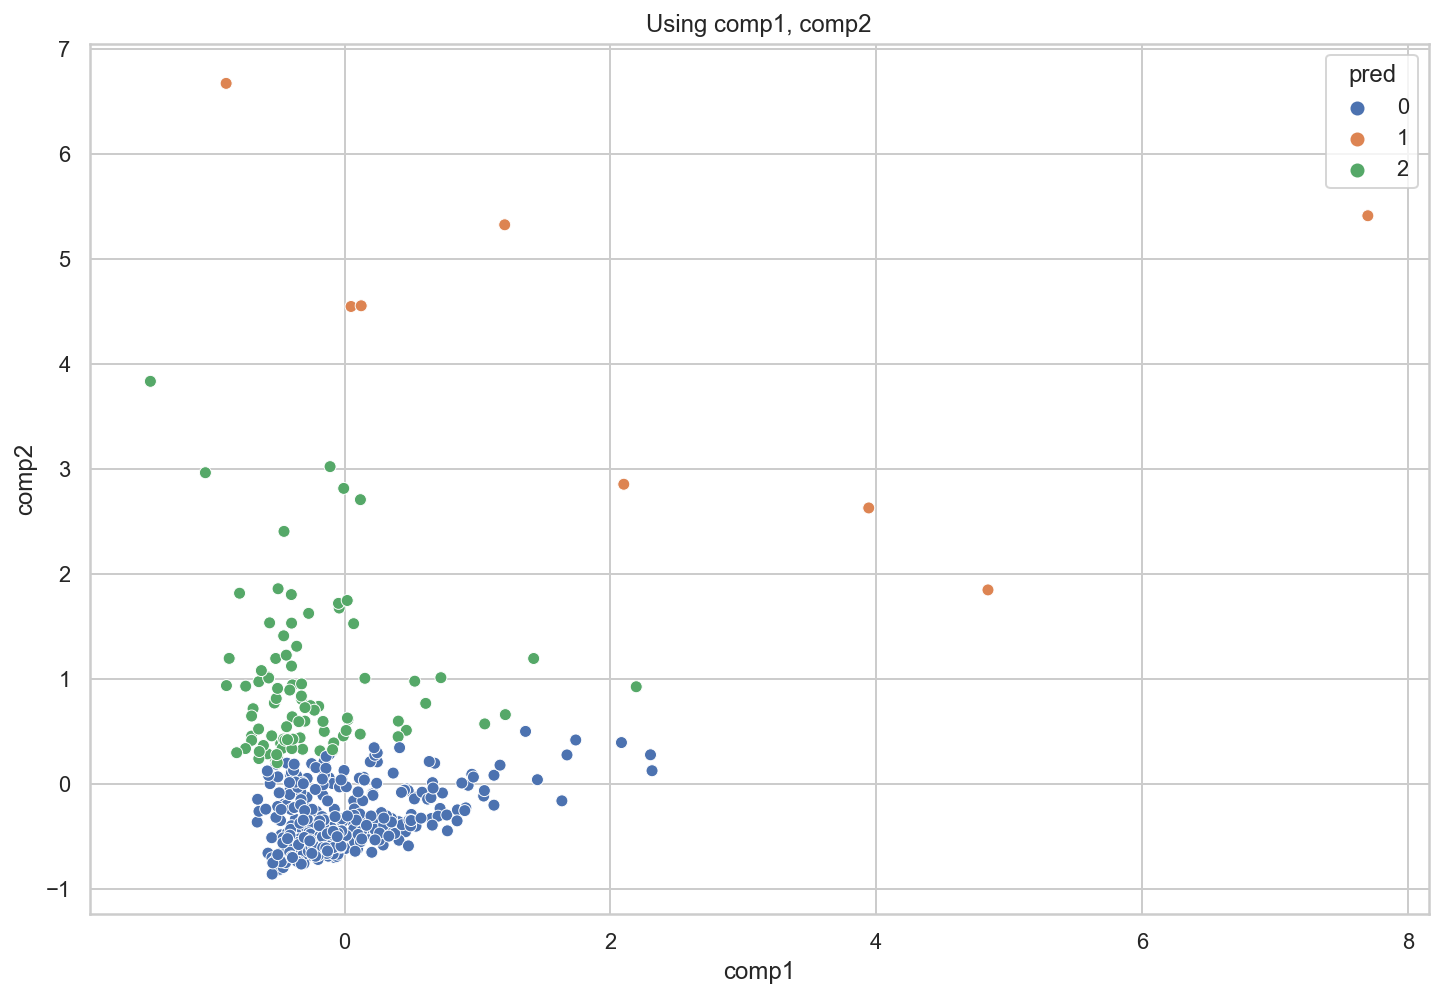

In [44]:
plt.figure(figsize = (12,8))
X = pd.DataFrame(data_2f[:, [0,1]], columns=['comp1', 'comp2'])

# we will use kmeans_2f_3c prediction to plot the 3 clusters 
# and compare it below with "region" label
X['pred'] = predict_3c
sns.scatterplot('comp1', 'comp2', data=X, hue='pred', palette="deep")
plt.title('Using comp1, comp2')
plt.show()

Using the 3 clusters gives us a triple separation that distinguishes 0,1, and 2 from each other. 

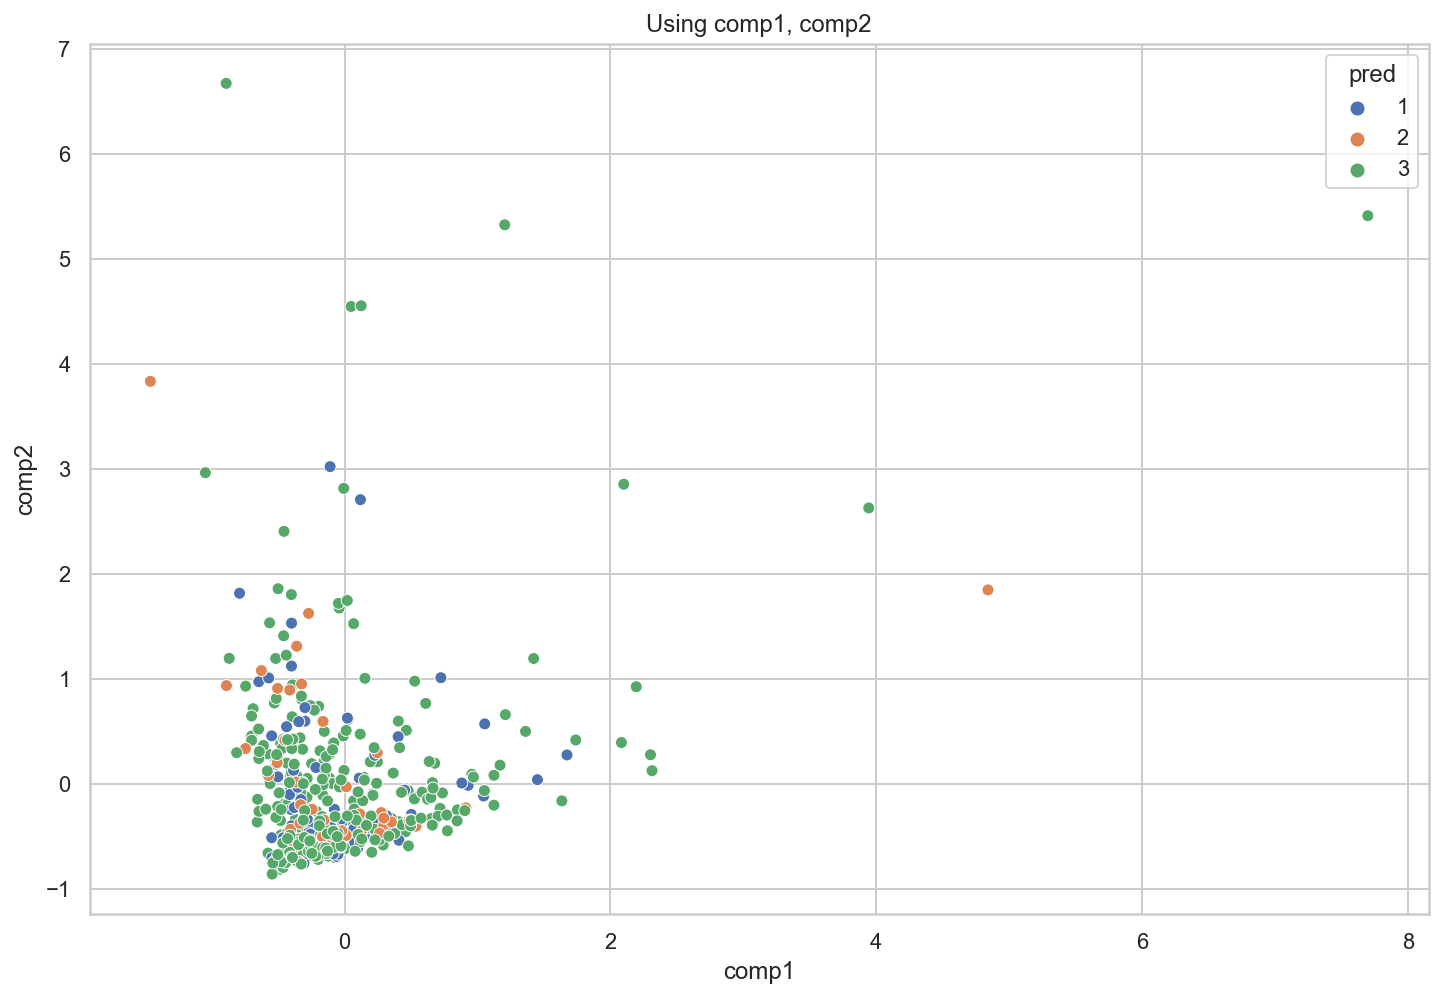

In [45]:
plt.figure(figsize = (12,8))
X = pd.DataFrame(data_2f[:, [0,1]], columns=['comp1', 'comp2'])

# using Region column to compare plots
X['pred'] = Region
sns.scatterplot('comp1', 'comp2', data=X, hue='pred', palette="deep")
plt.title('Using comp1, comp2')
plt.show()

The 2 plots above are very different in how they show 3 clusters and 3 regions. The graph above shows more of an overlap than the 3 k-means clusters.

Let's try 3 features from PCA:

## Extracting Three Features Utilizing PCA

In [46]:
# run PCA to get 3 components
num_comp = 3

pca = PCA()
while True: 
    try: 
        pca = PCA()
        pca.fit(data_normal)
        
        # reconstruct data from 2 components
        data_3f = np.dot(pca.transform(data_normal)[:,:num_comp], pca.components_[:num_comp,:])
        
        # we need to add the mean that was removed during standard scaling
        mean_data = np.mean(data_normal, axis=0)
        data_3f += mean_data
        
        break 
    except: 
        continue

In [47]:
data_3f = data_3f[:, 0:3]

In [48]:
data_3f.shape

(440, 3)

In [49]:
# k=3
kmeans_3f_3c = KMeans(n_clusters = 3, init='k-means++', max_iter = 1000, random_state = 1)
kmeans_3f_3c.fit(data_3f)
predict_3f_3c = kmeans_3f_3c.predict(data_3f)
centers_3f_3c = kmeans_3f_3c.cluster_centers_

In [50]:
# plt.figure(figsize = (12,8))
# X = pd.DataFrame(data_3f[:, [0,1,2]], columns=['comp1', 'comp2', 'comp3'])

# # we will use kmeans_2f_3c prediction to plot the 3 clusters 
# # and compare it below with "region" label
# X['pred'] = predict_3f_3c
# sns.scatterplot('comp1', 'comp2', data=X, hue='pred', palette="deep")
# plt.title('Using comp1, comp2')
# plt.show()

first = data_3f[:, 0]
second = data_3f[:, 1]
third = data_3f[:, 2]
fig = explot.scatter_3d(x=first, y = second, z = third, color = predict_3f_3c, width=900, height=600)
fig.show()

In [51]:
# using Region column to compare plots

first = data_3f[:, 0]
second = data_3f[:, 1]
third = data_3f[:, 2]
fig = explot.scatter_3d(x=first, y = second, z = third, color = Region, width=900, height=600)
fig.show()